# Définitions 

## Objectif de l'algorithme

L'algorithme de K-means est une méthode d'apprentissage non-supervisée dont l'objectif est de regrouper les observations qui sont similaires en ayant des groupes qui sont différents entre eux de façon significantes

## Similitude

La similarité de deux observations est mesurée par la distance qui les sépare. Il existe plusieurs possibilités pour définir une distance, par exemple:

* Distance euclidienne: 
    $$||X - Y|| = \sqrt{\sum(X_i - Y_i)^2}$$
    
* Distance euclidienne pondérée: 
    $$||X - Y|| = \sqrt{ \sum w_i \times(X_i - Y_i)^2}$$
    
* Distance de Manhattan:
    $$||X - Y|| = \sum|X_i - Y_i|$$

Dans le cas de la méthode de K-means, la distance utilisée est la distance euclidienne.

La similarité au sein d'un groupe est alors évaluée par la variance intra cluster:
$$ \frac{1}{n}\sum_{k=1}^n (X_k - \mu)^2 $$

avec $\mu = \frac{1}{n}\sum_{k=1}^n X_k$ le centroïde du cluster 

# Implémentation

Si on suppose K clusters,
1. choisir K observations parmi les observations pour servir de centroïdes initiaux
2. affecter chaque observation au centroïde dont elle est le plus proche
3. recalculer les centroïdes de chaque cluster
4. répéter les opérations 2 et 3 jusqu'à convergence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

number_per_bucket = 20

X = np.append(
    np.random.normal(0,0.75,number_per_bucket) ,
    np.random.normal(0.5,1,number_per_bucket)
)
Y = np.append(np.random.normal(2,1.5,number_per_bucket), np.random.normal(-2.5,1.5,number_per_bucket))
true_label = np.repeat([0,1],[20,20])
dataset = pd.DataFrame({"X" : X,"Y" : Y})

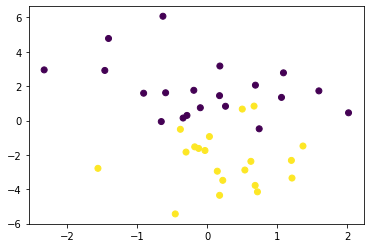

In [2]:
plt.scatter(X,Y,c=true_label)

In [ ]:
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the root of the sum of squared errors.
    '''
    error = np.sqrt(np.sum((a-b)**2))

    return error

def assign_cluster(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

In [ ]:
chosen_index = np.random.randint(40, size=2)
centroides = dataset.iloc[chosen_index]
iteration = 0

while iteration < 3:
    cluster,errors = assign_centroid(dataset, centroides)
    dataset["cluster"] = cluster
    centroides = dataset.groupby('cluster').agg('mean').loc[:,['X','Y']].reset_index(drop = True)
    iteration += 1

In [3]:
dataset

,X,Y
0,-0.653567,-0.059835
1,0.177335,1.447485
2,1.061032,1.346288
3,-0.342397,0.145145
4,1.088982,2.775638
5,-1.459001,2.914899
6,0.689056,2.058020
7,-2.323968,2.947065
8,-0.905238,1.589815
9,0.742913,-0.481109


In [ ]:
plt.scatter(dataset.X,dataset.Y,c=dataset.cluster)

# Discussion

1. Quelles devraient être les conditions d'arrêt de l'algorithme?
2. Comment choisir le nombre de classe?